In [ ]:
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
import os
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten

In [ ]:
os.listdir('/content/drive/MyDrive/Brain_Tumor')

['Training', 'Testing']

In [ ]:
os.listdir('/content/drive/MyDrive/Brain_Tumor/Training')

['glioma', 'pituitary', 'notumor', 'meningioma']

In [ ]:
os.listdir('/content/drive/MyDrive/Brain_Tumor/Testing')

['pituitary', 'notumor', 'meningioma', 'glioma']

In [ ]:
len(os.listdir('/content/drive/MyDrive/Brain_Tumor/Training'))

4

In [ ]:
len(os.listdir('/content/drive/MyDrive/Brain_Tumor/Testing'))

4

In [ ]:
len(os.listdir('/content/drive/MyDrive/Brain_Tumor/Training/glioma'))

1287

In [ ]:
len(os.listdir('/content/drive/MyDrive/Brain_Tumor/Training/meningioma'))

1319

In [ ]:
len(os.listdir('/content/drive/MyDrive/Brain_Tumor/Training/notumor'))

1574

In [ ]:
len(os.listdir('/content/drive/MyDrive/Brain_Tumor/Training/pituitary'))

1349

In [ ]:
len(os.listdir('/content/drive/MyDrive/Brain_Tumor/Testing/glioma'))

300

In [ ]:
len(os.listdir('/content/drive/MyDrive/Brain_Tumor/Testing/meningioma'))

306

In [ ]:
len(os.listdir('/content/drive/MyDrive/Brain_Tumor/Testing/notumor'))

405

In [ ]:
len(os.listdir('/content/drive/MyDrive/Brain_Tumor/Testing/pituitary'))

300

In [ ]:
datadir='/content/drive/MyDrive/Brain_Tumor/Training'

In [ ]:
#preprocesssing :training data
x_train=[]
y_train=[]
categories=['glioma', 'pituitary', 'notumor', 'meningioma']
for i in categories:
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    imgpath=os.path.join(path,img)
    img_array=imread(imgpath)
    img_resize=resize(img_array,(150,150,1))#1==>because binary image
    x_train.append(img_resize)
    y_train.append(categories.index(i))


In [ ]:
#preprocessing ,testing data
datadir1='/content/drive/MyDrive/Brain_Tumor/Testing'
x_test=[]
y_test=[]
categories1=['glioma', 'pituitary', 'notumor', 'meningioma']
for i in categories1:
  path1=os.path.join(datadir1,i)
  for img in os.listdir(path1):
    imgpath=os.path.join(path1,img)
    img_array=imread(imgpath)
    img_resize=resize(img_array,(150,150,1))
    x_test.append(img_resize)
    y_test.append(categories1.index(i))

In [ ]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [ ]:
#model creation
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,1)))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(4,activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#compile
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=20,batch_size=50)

Epoch 1/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.5267 - loss: 1.4184
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8714 - loss: 0.3604
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9164 - loss: 0.2272
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9613 - loss: 0.1193
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9805 - loss: 0.0722
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9886 - loss: 0.0455
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9975 - loss: 0.0197
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9995 - loss: 0.0090
Epoch 9/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9952 - loss: 0.0152
Epoch 10/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9995 - loss: 0.0038
Epoch 11/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 1.0000 - loss: 0.0015
Epoch 12/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
model.evaluate(x_test,y_test,batch_size=12)

110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9183 - loss: 0.3542


[0.248610258102417, 0.9466056227684021]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
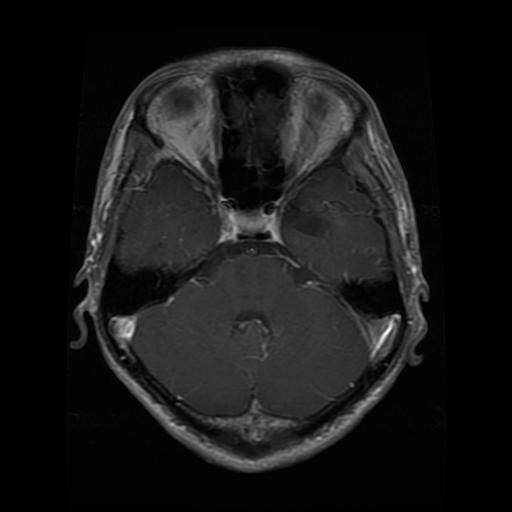

In [ ]:
#prediction  path of any image in testing data
img=imread('/content/drive/MyDrive/Brain_Tumor/Testing/glioma/Te-glTr_0001.jpg')
img

In [ ]:
img_res=resize(img,(1,150,150,1))
img_res.shape

(1, 150, 150, 1)

In [ ]:
y_new=model.predict(img_res)
y_new
ind=y_new.argmax()
ind
categories[ind]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step


'glioma'

In [ ]:
img=imread('/content/drive/MyDrive/Brain_Tumor/Testing/meningioma/Te-meTr_0003.jpg')
img=resize(img,(1,150,150,1))
y_new=model.predict(img)
ind=y_new.argmax()
categories[ind]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


'meningioma'